## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Problem Statement ##

You are given a dataset containing:
    - a training set for a linear function
    - a test set for testing the learned hypothesis function 
    
You will build a simple linear regression algorithm that can correctly identify the parameters of w0 and w1.

## 3 - Cost and Gradients ##

Forward Propagation:
- You get X
- You compute $h(x) = w_{1} * x + w_{0}$
- You calculate the cost function:  $$E(W) = \frac{1}{2m} \sum_{i=1}^{n} \left(h_{W}(x^{(i)})  - y^{(i)}\right)^2$$. 

Here are the two formulas you will be using: 

$$ \frac{\partial E}{\partial w_{1}} = \frac{1}{m} \sum_{i=1}^m (( w_{0} + w_{1} * x^{(i)} -y^{(i)}) * x^{(i)})\tag{8}$$
$$ \frac{\partial E}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^m (( w_{0} + w_{1} * x^{(i)} -y^{(i)}))\tag{8}$$

In [2]:
# FUNCTION: propagate
# Implement the cost function and gradients
def propagate(w_1, w_0, X, Y):
    """
    Arguments:
    w_1 -- the weight associated with the single feature, a scalar
    w_0 -- bias, a scalar
    X -- data of the series of single feature
    Y -- true "label" vector

    Return:
    cost -- outcome of the cost function
    dw_1 -- gradient of the loss with respect to w_1
    dw_0 -- gradient of the loss with respect to w_0
    
    """
    # m: number of training examples
    m = X.shape[1]
    
    cost = 0
    dw_1 = 0
    dw_0 = 0
    
    #iterate through all the training examples to
    #    1. Calculate the accumulated cost
    #    2. calcuate the accumulated gradient dw_0 and dw_1
    
    for i in range(m):
########
        #get x
        x = X[0, i]
        y = Y[0, i]
        
        #compute h(x) = w1 * x + w0
        h = (w_1 * x) + w_0

        #calculate the cost function       
        cost += (h - y) ** 2
        
        dw_1 += 2*((w_0 + (w_1 * x) - y) * x)  
        dw_0 += 2*(w_0 + (w_1 * x) - y)
########
    
    #Use the accumulated cost and gradients to calculate the averaged counterparts
    cost = cost / (2 * m)
    dw_1 = dw_1 / m
    dw_0 = dw_0 / m
    
    
    grads = {
        "dw_1": dw_1,
        "dw_0": dw_0
    }
    
    return grads, cost

## 4 Optimization with Gradient Descent
- You have computed a cost function and its gradients.
- Now, you want to update the parameters using gradient descent.

**Key points:** Write down the optimization function. The goal is to learn $w_{1}$ and $w_{0}$ by minimizing the cost function $E$. For a parameter $w$, the update rule is $ w = w - \alpha \text{ } dw$, where $\alpha$ is the learning rate.

In [3]:
#  FUNCTION: optimize

def optimize(w_1, w_0, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w_0 and w_1 by running a gradient descent algorithm
    
    Arguments:
    w_1 -- the weight associated with the single feature, a scalar
    w_0 -- bias, a scalar
    X -- data of the single feature
    Y -- true "label" vector 
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You need to finish the following steps:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w_0 and w_1.
    """
    
    costs = []
    
    for i in range(num_iterations):
########
        grads, cost = propagate(w_1, w_0, X, Y)
        
        dw_1 = grads['dw_1']
        dw_0 = grads['dw_0']
        
        w_1 = w_1 - learning_rate * dw_1
        w_0 = w_0 - learning_rate * dw_0
########        
        
        if((i % 100) == 0):
            costs.append(cost)
            
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        
    params = {
        "w_1": w_1,
        "w_0": w_0
    }

    grads = {
        "dw_1": dw_1,
        "dw_0": dw_0
    }
        
    return params, grads, costs

### Make Predictions ###
The predicted output is calculated as $h(x) = w_{1} * x + w_{0}$

In [4]:
# GRADED FUNCTION: predict

def predict(w_1, w_0, X):
    '''
    Predict the value using learned linear regression parameters (w_0, w_1)
    
    Arguments:
    w_1 -- the weight associated with the single feature, a scalar
    w_0 -- bias, a scalar
    X -- data of single feature
    
    Returns:
    Y_prediction -- predictions for all items in X
    '''
    
####
    # Hint: You can use matrix/array operation. 
    # For example, if B is a matrix, 2 * B ends up with every item in matrix B being multiplied by 2
     
    # X is a matrix here:   
    m = X.shape[1]
    A = np.zeros(shape=(1, m))
    
    for i in range(m):
        
        x = X[0, i]
        h = (w_1 * x) + w_0
        A[0, i] = h
####    
    
    return A

In [5]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    w_1 = 0
    w_0 = 0
    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w_1, w_0, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w_1 and w_0 from dictionary "parameters"
    w_1 = parameters["w_1"]
    w_0 = parameters["w_0"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w_1, w_0, X_test)
    Y_prediction_train = predict(w_1, w_0, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w_1" : w_1, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Load Data and Start the Learning Process ###
You can change num_iterations and learning_rate to see the learning process

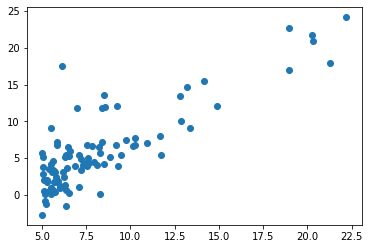

Cost after iteration 0: 32.072734
Cost after iteration 100: 5.175697
Cost after iteration 200: 4.816282
Cost after iteration 300: 4.641746
Cost after iteration 400: 4.556988
Cost after iteration 500: 4.515829
Cost after iteration 600: 4.495841
Cost after iteration 700: 4.486135
Cost after iteration 800: 4.481421
Cost after iteration 900: 4.479132
train accuracy: -120.09382333439521 %
test accuracy: -1658.8427174795784 %
w_1 is 1.1822480052540147 and w_0 is -3.7884192615511836


In [6]:
df = pd.read_csv('housing_train.csv', header=None)

#Load the training set
X_train = df[0].values.reshape(-1, 1).T
Y_train = df[1].values.reshape(-1, 1).T

#load the testing set
df_test = pd.read_csv('test.csv', header=None)
X_test = df_test[0].values.reshape(-1, 1).T
Y_test = df_test[1].values.reshape(-1, 1).T

#Draw the curve of the training examples
plt.scatter(X_train, Y_train)
plt.show()

#Call the model
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.01, print_cost = True)

#Print out the weights
print("w_1 is " + str(d['w_1']) + " and w_0 is " + str(d['w_0']))

### Plot the learning curve ###

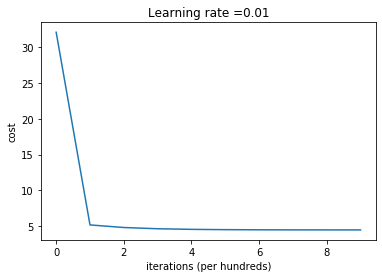

In [7]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()